In [1]:
# Dependencies
import requests
import json
import requests
import pandas as pd
import numpy as np


In [2]:
from config import api_key

ModuleNotFoundError: No module named 'config'

In [ ]:

from pprint import pprint
pprint(...)

In [ ]:
url = "https://api.sportsdata.io/v3/nba/scores/json/Players?"

In [ ]:
query_url = f"{url}key={api_key}"

In [ ]:
response = requests.get(query_url)
response_json = response.json()
pprint(json.dumps(response_json,indent=4, sort_keys=True))


In [ ]:
response_json[0]

In [ ]:
players=pd.DataFrame(response_json)

In [ ]:
players.to_pickle('players.pkl')
players.to_csv('players.csv', index=False)

In [ ]:
players = pd.read_pickle('players.pkl')

In [ ]:
players.head()


In [ ]:
players.columns

In [ ]:
use_col = ['Team', 'PositionCategory','Position', 'FirstName', 'LastName', 'Height', 'Weight', 'BirthDate', 'BirthCity', 'BirthState', 
                        'BirthCountry', 'College', 'Salary', 'PhotoUrl', 'Experience']

In [ ]:
healthinfo_df = players[use_col].copy()
healthinfo_df

In [ ]:
healthinfo_df['BMI'] = np.round((healthinfo_df['Weight']/healthinfo_df['Height']**2) * 703, decimals = 2)
healthinfo_df.head()

In [ ]:
healthinfo_df['PLAYER_NAME'] = healthinfo_df['FirstName'] + ' ' + healthinfo_df['LastName']

In [ ]:
# Percentage of players
with open('./_players_all_data.json') as json_file:
    data = json.load(json_file)

stats = pd.read_json(data)
stats.head()


In [ ]:
stats.columns

In [ ]:
def agg_stats(rows):
    num_season = rows['SEASON_ID'].nunique()
    num_games = rows['GP'].sum()
    min_game = (rows['MIN']/rows['GP']).mean()
    age = rows['PLAYER_AGE'].max()
    return pd.Series({'age': age, 'num_season': num_season, 'num_games': num_games, 'min_game': min_game})

In [ ]:
player_stats = stats.groupby('PLAYER_NAME').apply(agg_stats).reset_index()
player_stats.head()

In [ ]:
combined = healthinfo_df.merge(player_stats, on='PLAYER_NAME')

In [ ]:
combined.corr()

In [ ]:
combined.columns

In [ ]:
combined 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns.boxenplot(y='Position', x='BMI', data=combined)

In [ ]:
sns.scatterplot(y='min_game', x='Experience', hue = 'BMI', data=combined)

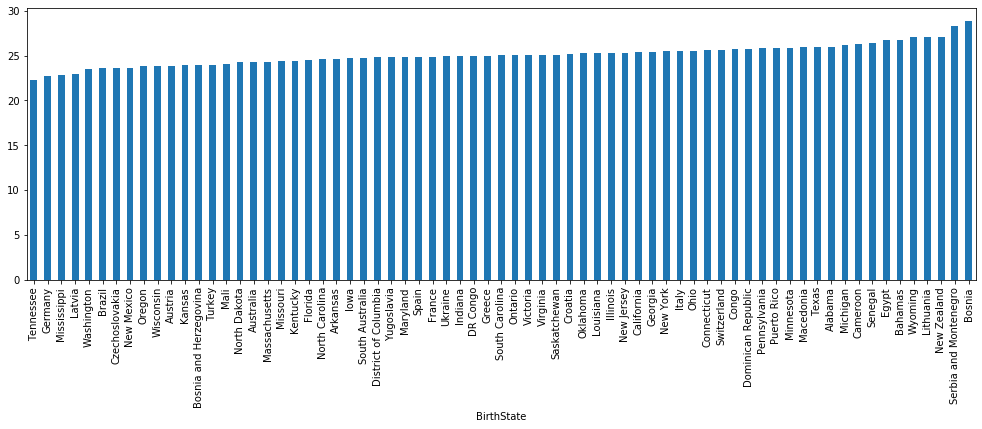

In [20]:
combined.groupby('BirthState')['BMI'].mean().sort_values().plot(kind='bar', figsize=(17,5))

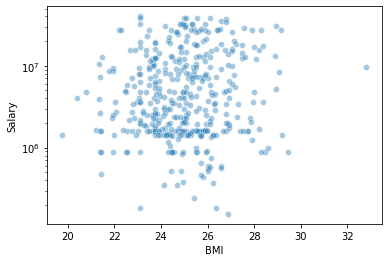

In [21]:
sns.scatterplot(y='Salary', x='BMI', data=combined, alpha=0.4)
plt.yscale('log')

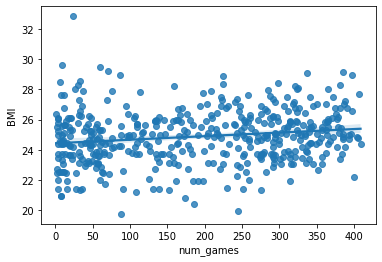

In [22]:
sns.regplot(x='num_games', y='BMI', data=combined)

In [30]:
import plotly.express as px

In [43]:
fig.write_html('salary_bmi_player_name_scatter.html')

In [44]:
fig = px.scatter(combined, y='Salary', x='BMI', hover_data=['PLAYER_NAME'])
fig.show()

In [41]:
fig.write_html('min_game_experience_bmi_scatter.html')

In [42]:
fig = px.scatter(combined, y='min_game', x='Experience',color='BMI', hover_data=['PLAYER_NAME'])
fig.show()

In [39]:
fig.write_html('Position_BMI_box.html')

In [40]:
px.box(combined, y='Position', x='BMI', color='Position')

In [47]:
fig.write_html('PositionCategory_BMI_violinbox.html')

In [48]:
px.violin(combined, y='PositionCategory', x='BMI', color='PositionCategory', box=True)